Train vs validation loss on sample run.

In [25]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

dir_proj = os.path.dirname(os.path.abspath(os.getcwd()))+'/'
model_timestamp = "2023-12-03_00-48"
export_path = f'{dir_proj}reports/export/{model_timestamp}/'
path_fit_history = f'{export_path}fit_history_{model_timestamp}.csv'
path_equity_line_array = f'{export_path}eq_line_{model_timestamp}.pkl'

df_fit_history = pd.read_csv(path_fit_history)
with open(path_equity_line_array, 'rb') as fh:
    array_equity_line = pickle.load(fh)

,loss,val_loss,window_index,diff
0,0.007931,0.000251,0,0.007680
1,0.000814,0.000112,0,0.000702
2,0.000395,0.000245,0,0.000150
3,0.000261,0.000091,0,0.000170
4,0.000222,0.000091,0,0.000131


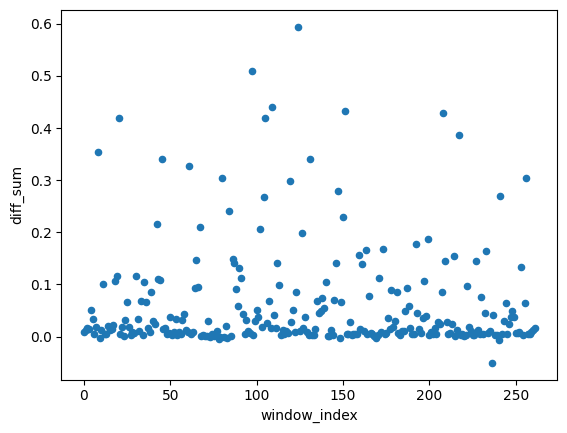

In [63]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
df_fit_history["diff"] = df_fit_history["loss"] - df_fit_history["val_loss"]
display(df_fit_history.head())
df_window_train_val_diff_sum = df_fit_history\
    .groupby("window_index")\
    .agg(diff_sum=("diff", "sum"))\
    .reset_index(drop=False)\
    .plot.scatter(x="window_index", y="diff_sum")

# display(df_window_train_val_diff_sum.head())
# df_fit_history["diff"].plot.line()